In [1]:
import sys 
sys.path.append('/home/pierre-edouard/Desktop/ICL/Git_LHCb')


# Plot parameters distribution for Minuit N=10000 

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import b_meson_fit as bmf 
from test_iminuit import amplitude_latex_names ,amplitude_names, LaTex_labels , Standard_labels , fix_array
import seaborn as sns


print(fix_array)

signal_coeffs = bmf.coeffs.signal(bmf.coeffs.SM)
Coef0=[i.numpy() for i in signal_coeffs] 
print(Coef0)


dataP = pd.read_csv("/home/pierre-edouard/Desktop/ICL/Git_LHCb/Minuit/Test_stats/data_Pierre.csv")
dataP = dataP.values

dataI = pd.read_csv("/home/pierre-edouard/Desktop/ICL/Git_LHCb/Minuit/Test_stats/data.csv")
dataI = dataI.values


data=np.vstack((dataP , dataI))

def get_arrays(data , N):
    '''
        Inputs : data (2d array format) , N (number of migrad fits)
        
        Splits the csv data in two arrays for amplitudes and associated errors, both of dimension (N , 48) 
    '''
    raw_data=data[0:N,:]
    print('Shape input array :' , np.shape(raw_data))
    coefs , errors = np.zeros((N , 48)) , np.zeros((N , 48))
    print('Shape output arrays :' , np.shape(coefs) , np.shape(errors))
    for i in range(0,96,2):
        coefs[: , int(i/2)]= raw_data[: , i]
        errors[: , int(i/2)]= raw_data[: , i+1]
    return coefs , errors

def gaussian(x, mu, sig):
    #(1/(np.sqrt(2*np.pi*np.power(sig , 2.))))*
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))




[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1]
[-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]


Shape input array : (1000, 96)
Shape output arrays : (1000, 48) (1000, 48)
   ___________________________________________
alpha(a_para_l_re)


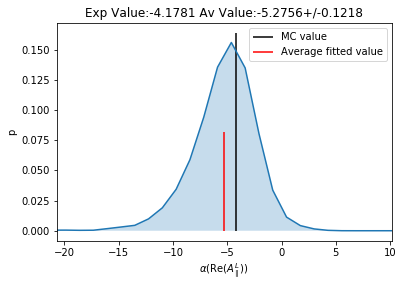

   ___________________________________________
beta(a_para_l_re)


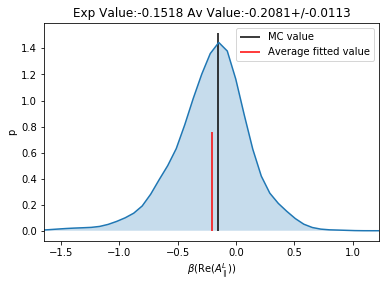

   ___________________________________________
gamma(a_para_l_re)


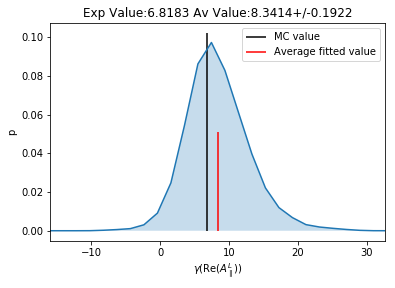

   ___________________________________________
alpha(a_para_l_im)


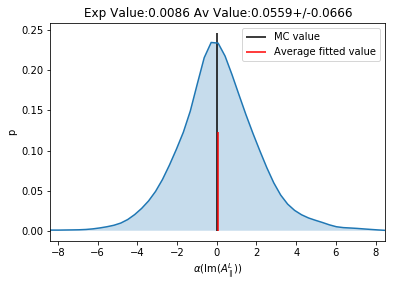

   ___________________________________________
beta(a_para_l_im)


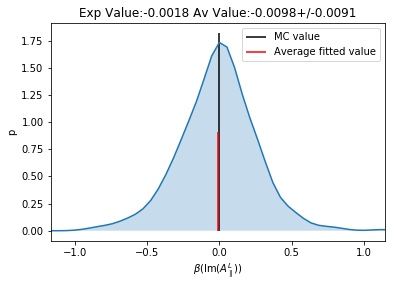

   ___________________________________________
gamma(a_para_l_im)


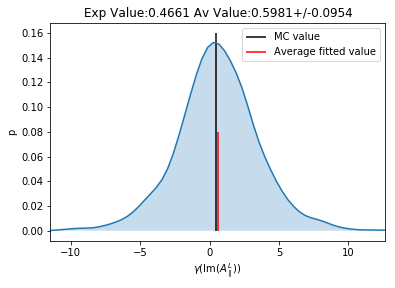

   ___________________________________________
alpha(a_para_r_re)


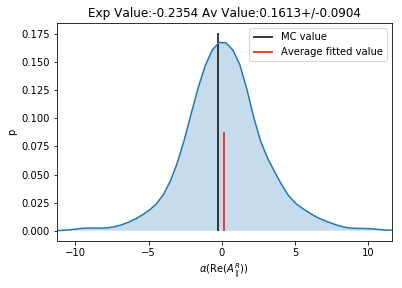

   ___________________________________________
beta(a_para_r_re)


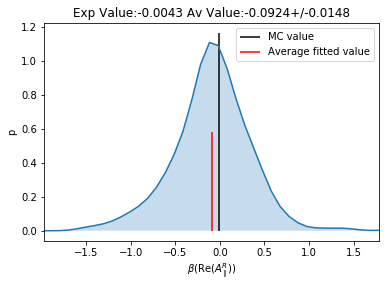

   ___________________________________________
gamma(a_para_r_re)


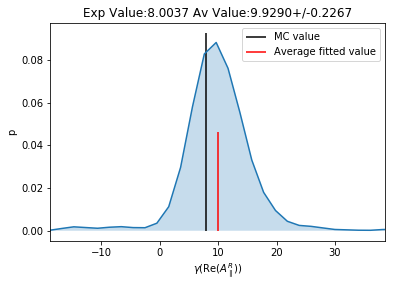

   ___________________________________________
alpha(a_para_r_im)


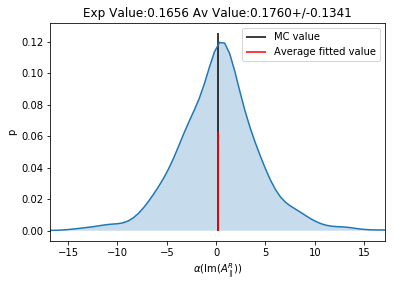

   ___________________________________________
beta(a_para_r_im)


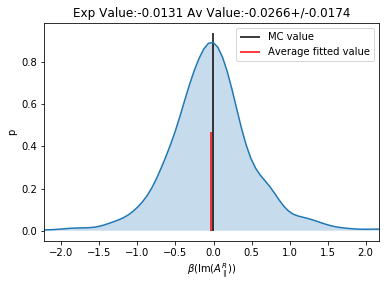

   ___________________________________________
gamma(a_para_r_im)


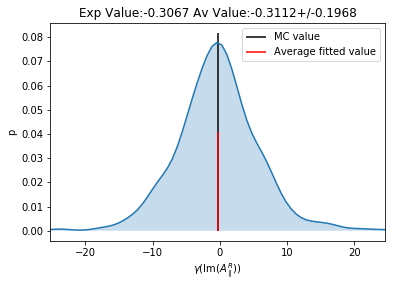

   ___________________________________________
alpha(a_perp_l_re)


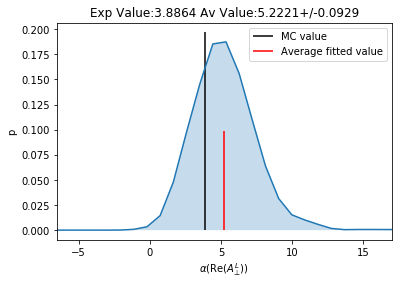

   ___________________________________________
beta(a_perp_l_re)


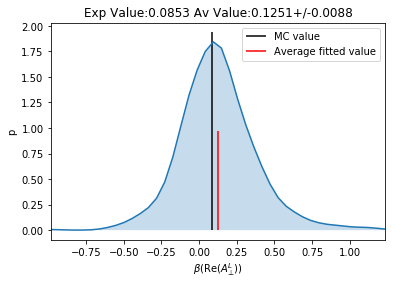

   ___________________________________________
gamma(a_perp_l_re)


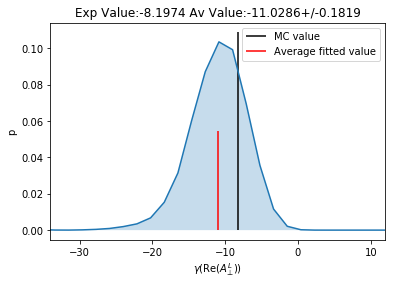

   ___________________________________________
alpha(a_perp_l_im)


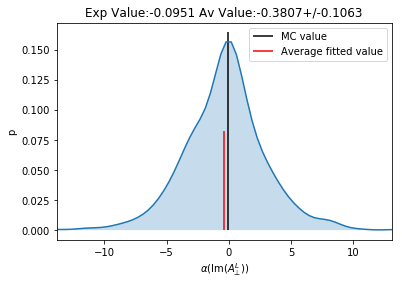

   ___________________________________________
beta(a_perp_l_im)


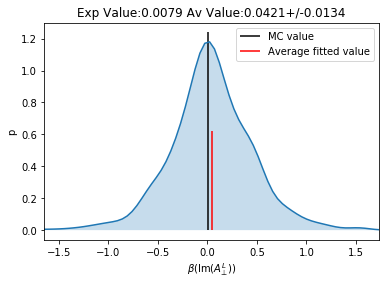

   ___________________________________________
gamma(a_perp_l_im)


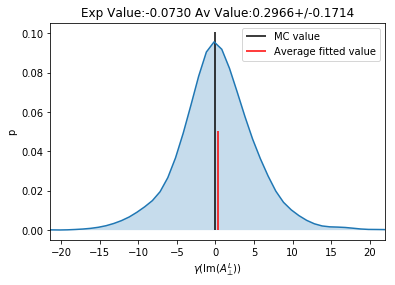

   ___________________________________________
alpha(a_perp_r_re)


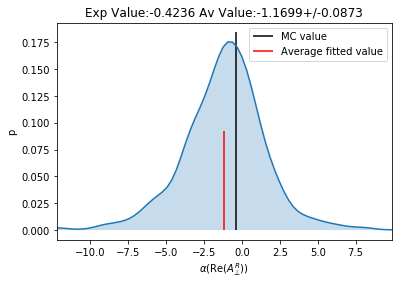

   ___________________________________________
beta(a_perp_r_re)


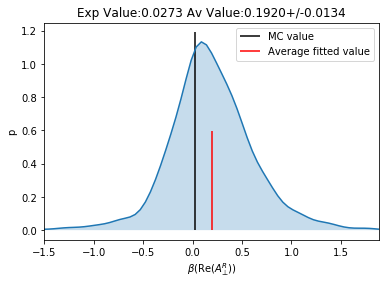

   ___________________________________________
gamma(a_perp_r_re)


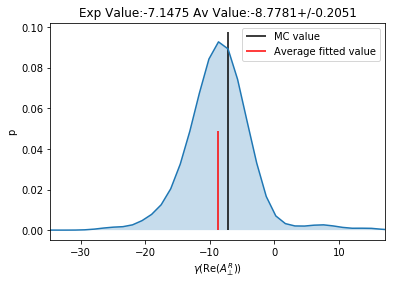

   ___________________________________________
alpha(a_0_l_re)


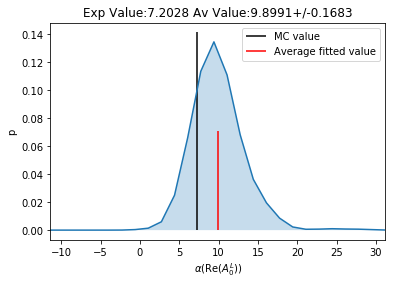

   ___________________________________________
beta(a_0_l_re)


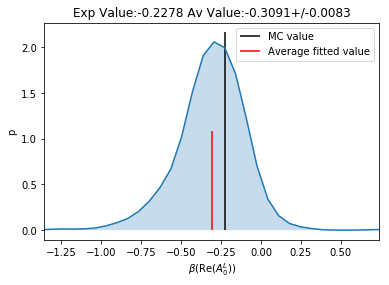

   ___________________________________________
gamma(a_0_l_re)


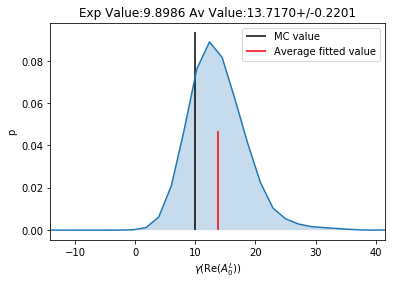

   ___________________________________________
alpha(a_00_l_re)


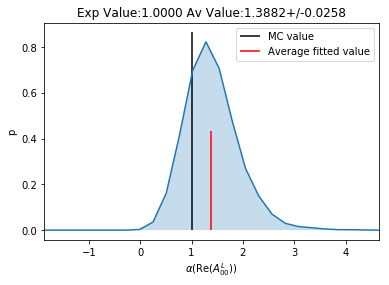

   ___________________________________________
alpha(a_00_l_im)


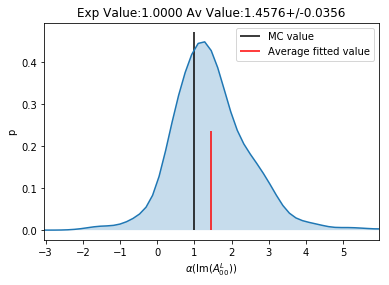

   ___________________________________________
alpha(a_00_r_re)


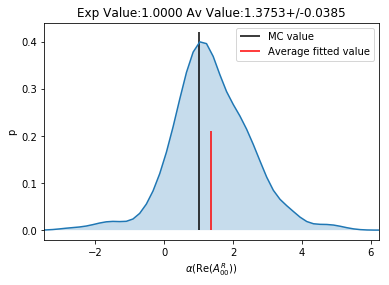

   ___________________________________________
alpha(a_00_r_im)


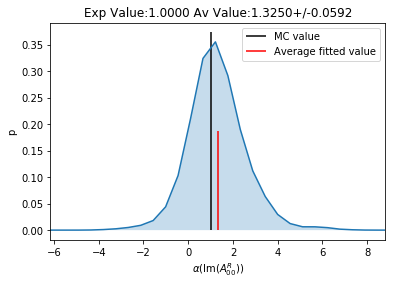

IndexError: list index out of range

In [3]:

N=1000


LaTex=LaTex_labels(amplitude_latex_names)
Title=Standard_labels(amplitude_names)
coefs , errs = get_arrays(data , N)
meanLiam=[-3.99891 , -0.16856 , +6.29739 , +0.00086 , -0.00149  , +0.53478 , +0.33127 , -0.10475 , +7.65988 , +0.28405 , 0.03372 , -0.57944 , +3.93645 , +0.11211 , -8.42401 , -0.30081 ,  +0.03393 , +0.24708 , -0.85217 , +0.14706 , -7.14570 , +7.72792 , -0.25409 , +10.48869 , +1.07207 , +1.13120 , +1.11802 , +0.99124 ]
errsLiam=[0.06524 , 0.00809 , 0.10144 , 0.05081 , 0.00686 , 0.07358 , 0.07850 , 0.01205 , 0.10793 , 0.13308 , 0.01694 , 0.18585 , 0.04978 , 0.00618 , 0.08420 , 0.07814 , 0.00998 , 0.11652 , 0.07631 , 0.01185 , 0.10741 , 0.06190 , 0.00450 , 0.09043 , 0.01003 , 0.02296 , 0.02304 , 0.02580 ]
j=0
for J in range(len(coefs)):
    if fix_array[J]==0:
        A=coefs[:,J]

        fig , ax =plt.subplots()

        ave_val=np.mean(A)
        width=np.std(A)


        print('   ___________________________________________')
        print(Title[J])

        #print(width)
        true_val=Coef0[J]
        clean_idx=[]
        for a in range(len(A)):

            if abs(A[a]) > width/1 :
                #print(a)
                #print(Coef0[J] , A[a])
                clean_idx.append(a)


        #n , bins , _ =plt.hist(A  , bins = 80 , normed= True)
        ax=sns.kdeplot(A  , shade=True)
        #print(n)
        ymin, ymax = ax.get_ylim()

        ax.vlines(true_val, ymin , ymax , label='MC value')
        ax.set_xlim([ave_val-6*width, ave_val+6*width])
        ax.vlines(ave_val , ymin , ymax/2 , label='Average fitted value' , color='r')  
        ax.set(xlabel=LaTex[J], ylabel=r'p')
        ax.set_title('Exp Value:'+str(format(true_val, '.4f'))+' Av Value:'+str(format( ave_val, '.4f'))+'+/-'+str(format(width/np.sqrt(1000), '.4f')))

        #print(coefs[:,j])

        plt.xlim((ave_val-4*width , ave_val+4*width))

        #xmin= meanLiam[0] - 10*np.sqrt(2400)*errsLiam[0] 
        #xmax= meanLiam[0] + 10*np.sqrt(2400)*errsLiam[0] 
        xmin , xmax = ax.get_xlim()
        X=np.linspace(xmin , xmax)
        plt.legend()
        plt.show()
        #plt.plot(X , max(n)*gaussian( X , meanLiam[j] , np.sqrt(1000)*errsLiam[j]) , '-')
'''
        Xmin , Xmax = ave_val-width ,  ave_val+width/np.sqrt(1000)
        ax.axvspan(Xmin, Xmax, alpha=0.1, color='red' , label= r'$\pm \sigma$')
        ax.legend()
        
'''
        

Shape input array : (1000, 96)
Shape output arrays : (1000, 48) (1000, 48)
   ___________________________________________
alpha(a_para_l_re)
   ___________________________________________
beta(a_para_l_re)
   ___________________________________________
gamma(a_para_l_re)
   ___________________________________________
alpha(a_para_l_im)
   ___________________________________________
beta(a_para_l_im)
   ___________________________________________
gamma(a_para_l_im)
   ___________________________________________
alpha(a_para_r_re)
   ___________________________________________
beta(a_para_r_re)
   ___________________________________________
gamma(a_para_r_re)
   ___________________________________________
alpha(a_para_r_im)
   ___________________________________________
beta(a_para_r_im)
   ___________________________________________
gamma(a_para_r_im)
   ___________________________________________
alpha(a_perp_l_re)
   ___________________________________________
beta(a_perp_l_re)
   ___

/home/pierre-edouard/.local/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


   ___________________________________________
alpha(a_00_l_re)
   ___________________________________________
alpha(a_00_l_im)
   ___________________________________________
alpha(a_00_r_re)
   ___________________________________________
alpha(a_00_r_im)


IndexError: list index out of range

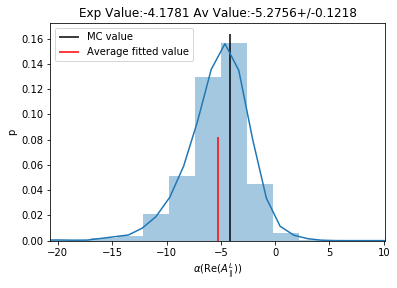

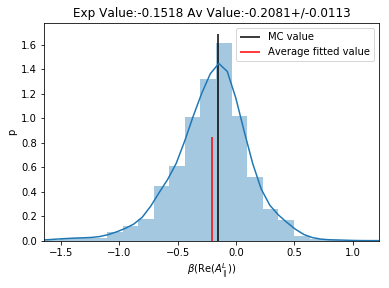

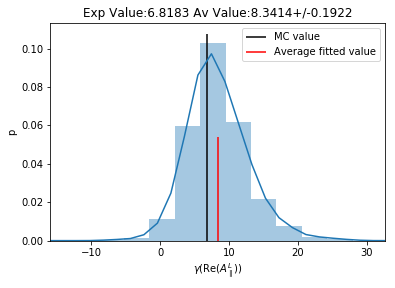

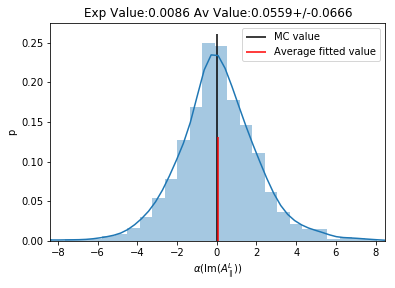

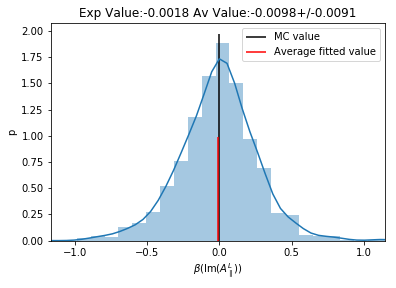

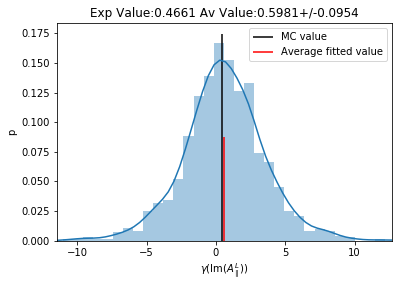

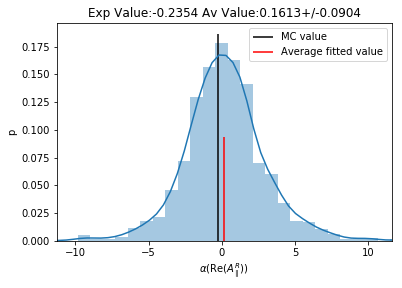

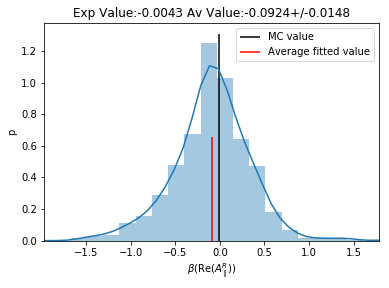

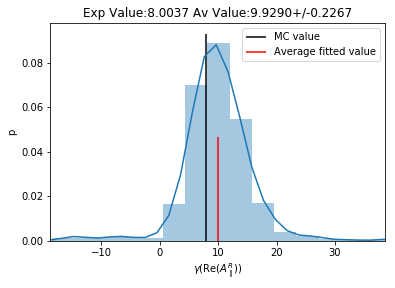

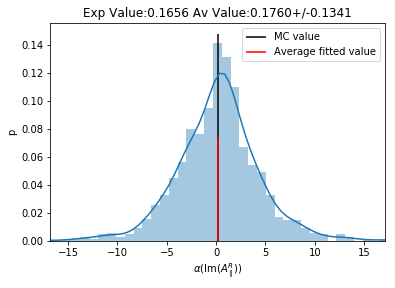

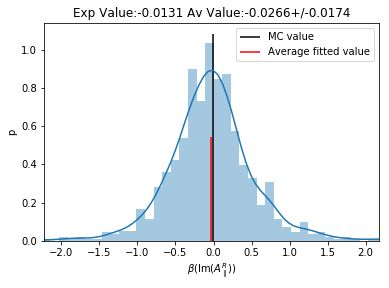

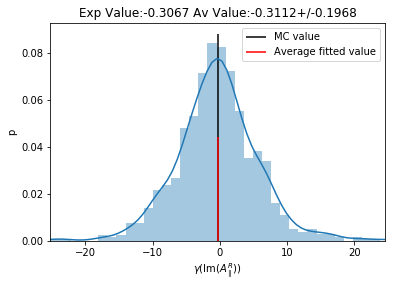

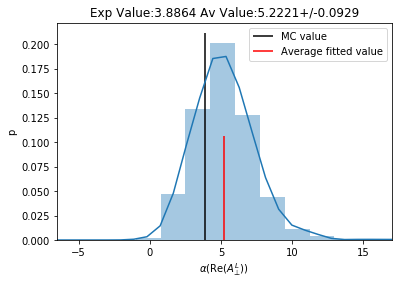

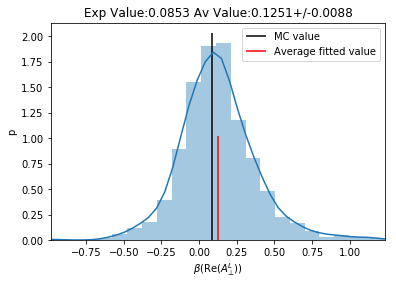

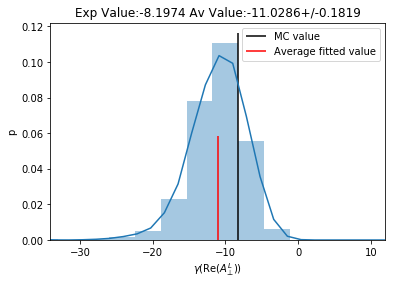

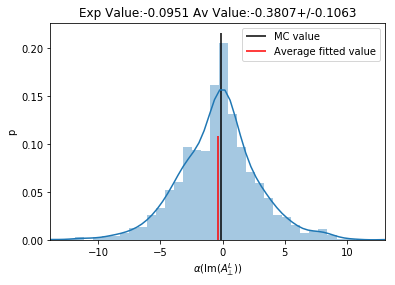

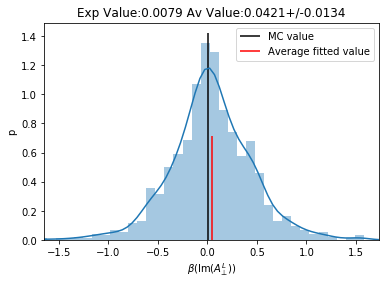

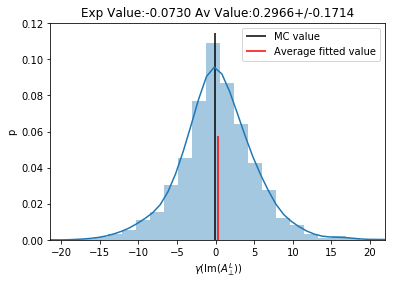

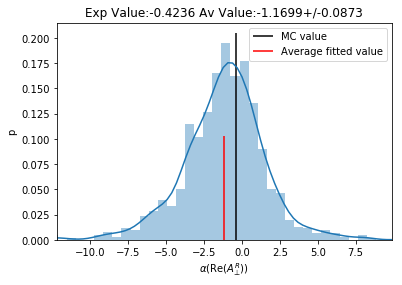

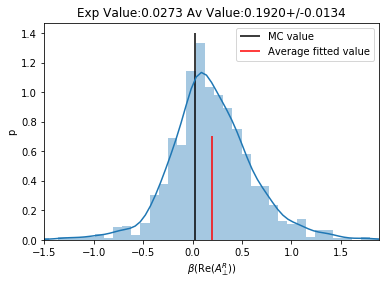

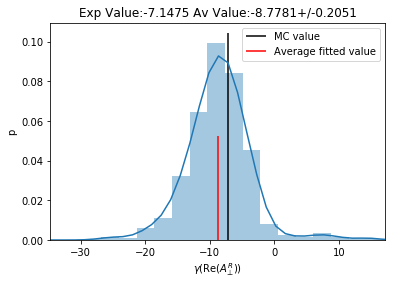

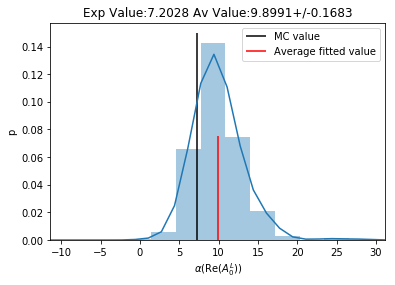

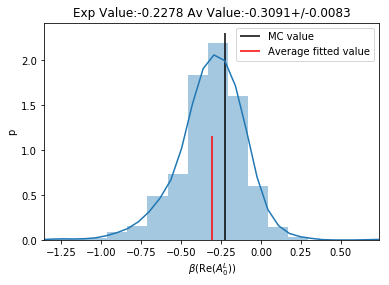

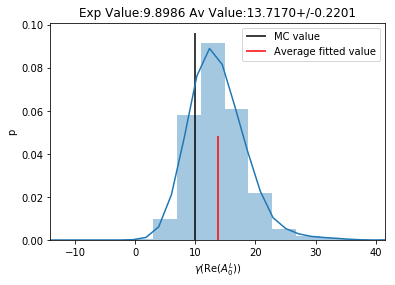

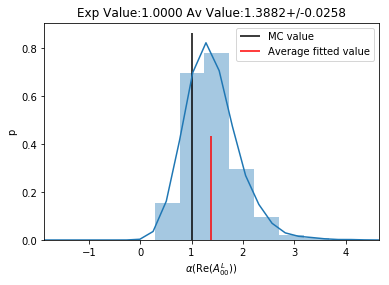

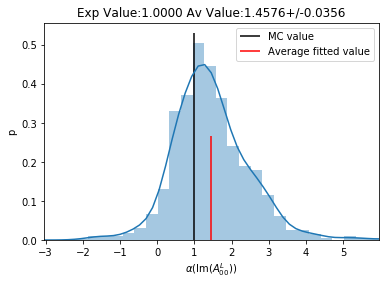

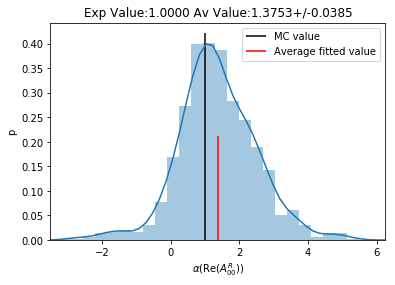

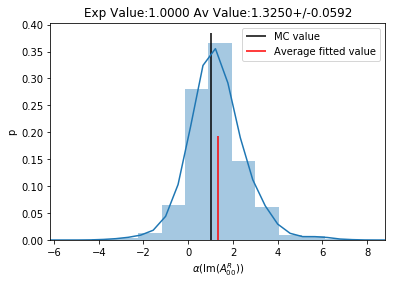

In [4]:
dataP = pd.read_csv("/home/pierre-edouard/Desktop/ICL/Git_LHCb/Minuit/Test_stats/data_Pierre.csv")
dataP = dataP.values

dataI = pd.read_csv("/home/pierre-edouard/Desktop/ICL/Git_LHCb/Minuit/Test_stats/data.csv")
dataI = dataI.values


data=np.vstack((dataP , dataI))

N=1000

LaTex=LaTex_labels(amplitude_latex_names)
Title=Standard_labels(amplitude_names)
coefs , errs = get_arrays(data , N)

for J in range(len(coefs)):
    if fix_array[J]==0:
        A=coefs[:,J]

        fig , ax =plt.subplots()

        ave_val=np.mean(A)
        width=np.std(A)


        print('   ___________________________________________')
        print(Title[J])

        #print(width)
        true_val=Coef0[J]
        clean_idx=[]
        for a in range(len(A)):

            if abs(A[a]) > width/1 :
                #print(a)
                #print(Coef0[J] , A[a])
                clean_idx.append(a)


        #n , bins , _ =plt.hist(A  , bins = 80 , normed= True)
        ax=sns.distplot(A)
        #x, y = ax.get_lines()[0].get_data()
        #plt.plot(x , y)
        #print(n)
        ymin, ymax = ax.get_ylim()

        ax.vlines(true_val, ymin , ymax , label='MC value')
        ax.set_xlim([ave_val-6*width, ave_val+6*width])
        ax.vlines(ave_val , ymin , ymax/2 , label='Average fitted value' , color='r')  
        ax.set(xlabel=LaTex[J], ylabel=r'p')
        ax.set_title('Exp Value:'+str(format(true_val, '.4f'))+' Av Value:'+str(format( ave_val, '.4f'))+'+/-'+str(format(width/np.sqrt(1000), '.4f')))

        #print(coefs[:,j])

        plt.xlim((ave_val-4*width , ave_val+4*width))

        #xmin= meanLiam[0] - 10*np.sqrt(2400)*errsLiam[0] 
        #xmax= meanLiam[0] + 10*np.sqrt(2400)*errsLiam[0] 
        xmin , xmax = ax.get_xlim()
        X=np.linspace(xmin , xmax)
        plt.legend()
        #plt.show()
        #plt.plot(X , max(n)*gaussian( X , meanLiam[j] , np.sqrt(1000)*errsLiam[j]) , '-')
'''
        Xmin , Xmax = ave_val-width ,  ave_val+width/np.sqrt(1000)
        ax.axvspan(Xmin, Xmax, alpha=0.1, color='red' , label= r'$\pm \sigma$')
        ax.legend()
        
'''
        

# Plot pulls for Minuit N=10000 

Shape input array : (1000, 96)
Shape output arrays : (1000, 48) (1000, 48)

0
   ___________________________________________
alpha(a_para_l_re)
0.26792292873541235
1.3403756610155424


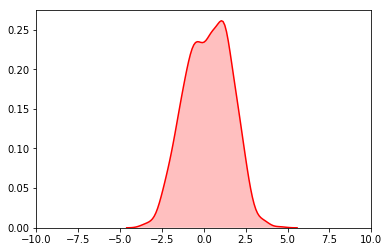

1
   ___________________________________________
beta(a_para_l_re)
0.22210037494819182
1.692712697273351


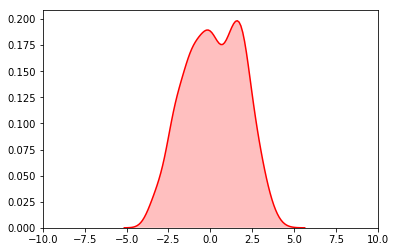

2
   ___________________________________________
gamma(a_para_l_re)
-0.3093786047508664
1.5877605804792405


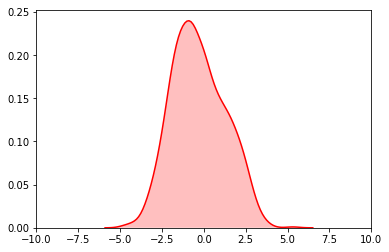

3
   ___________________________________________
alpha(a_para_l_im)
-0.07894678446312733
1.471702173615796


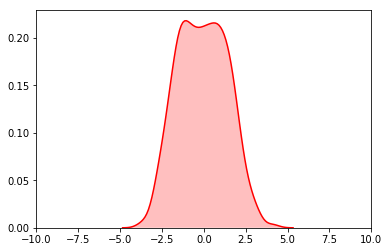

4
   ___________________________________________
beta(a_para_l_im)
0.05079838026987365
1.4743237032644034


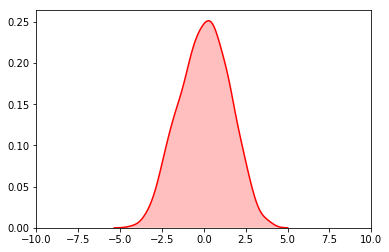

5
   ___________________________________________
gamma(a_para_l_im)
0.055450403297395826
1.4638660376574666


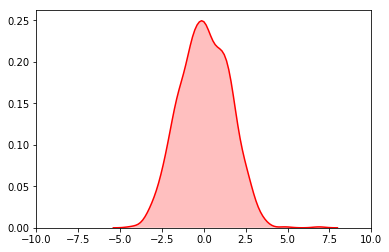

6
   ___________________________________________
alpha(a_para_r_re)
0.1409221122166047
1.5112190097034315


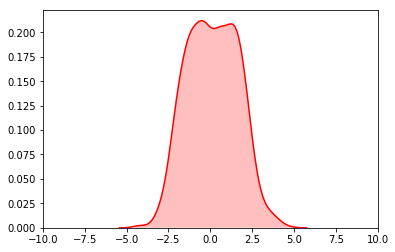

7
   ___________________________________________
beta(a_para_r_re)
-0.16589303046079357
1.7824564732854158


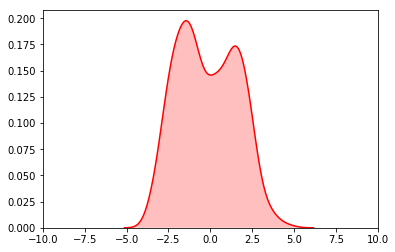

8
   ___________________________________________
gamma(a_para_r_re)
-0.10409082265439343
1.684809605503896


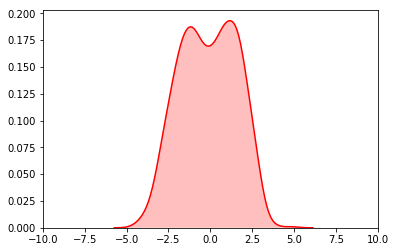

9
   ___________________________________________
alpha(a_para_r_im)
-0.07656895878963967
1.5640439038939793


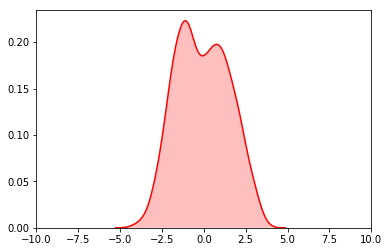

10
   ___________________________________________
beta(a_para_r_im)
-0.0029510449590217824
1.7233120246372504


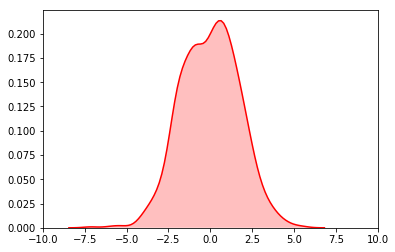

11
   ___________________________________________
gamma(a_para_r_im)
-0.001493316110317366
1.5619731818822158


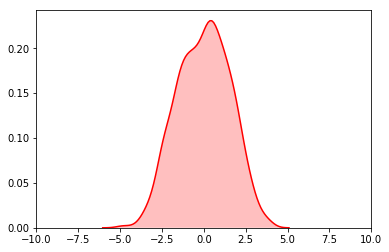

12
   ___________________________________________
alpha(a_perp_l_re)
-0.08646117677832973
1.4034520713892387


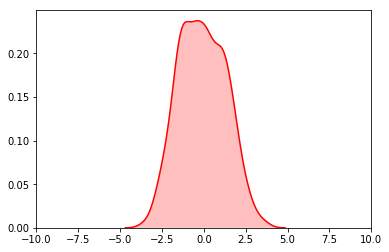

13
   ___________________________________________
beta(a_perp_l_re)
0.12049937809534816
1.683782243143671


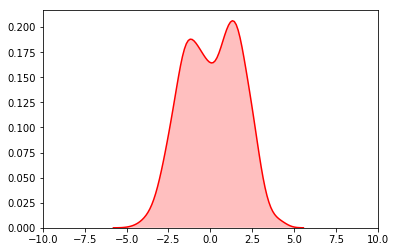

14
   ___________________________________________
gamma(a_perp_l_re)
-0.05158921809304989
1.4688760518665755


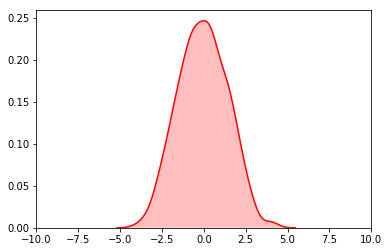

15
   ___________________________________________
alpha(a_perp_l_im)
-0.05308809436911487
1.426755575080121


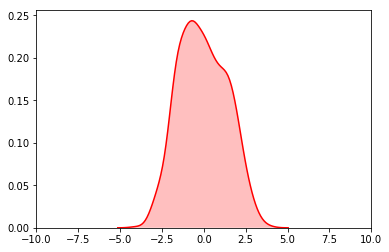

16
   ___________________________________________
beta(a_perp_l_im)
-0.04971796881253302
1.468457490011523


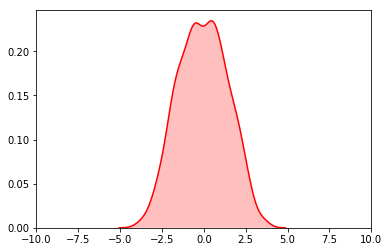

17
   ___________________________________________
gamma(a_perp_l_im)
0.07555325826570891
1.4594914632735445


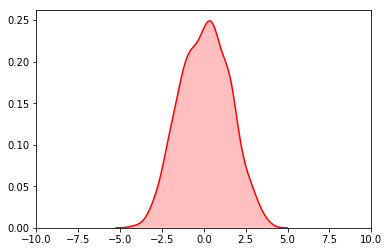

18
   ___________________________________________
alpha(a_perp_r_re)
-0.08688892438827256
1.5352615671102625


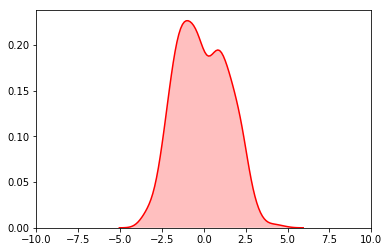

19
   ___________________________________________
beta(a_perp_r_re)
0.4169674806529304
1.7665799585269057


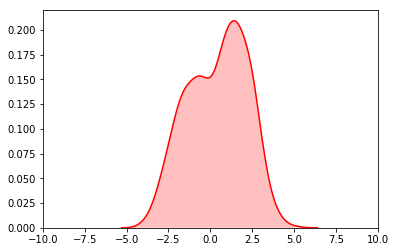

20
   ___________________________________________
gamma(a_perp_r_re)
-0.13079563559411814
1.6708957240533913


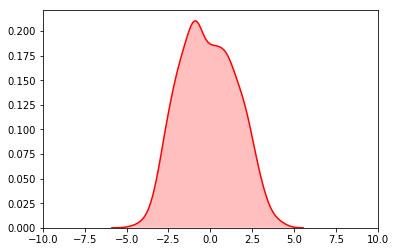

24
   ___________________________________________
alpha(a_0_l_re)
0.18731522509519674
1.5831877399719614


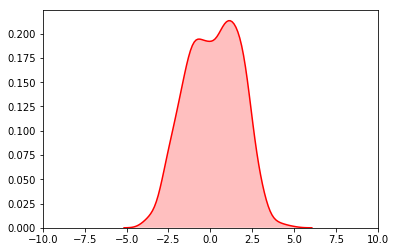

25
   ___________________________________________
beta(a_0_l_re)
-0.043487295331176214
1.7493231940415943


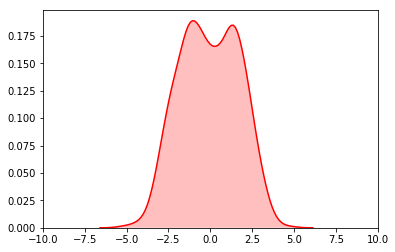

26
   ___________________________________________
gamma(a_0_l_re)
0.10215777385282601
1.7101487119831902


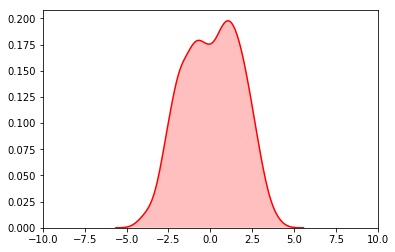

36
   ___________________________________________
alpha(a_00_l_re)
0.08508873915154522
1.178996018624201


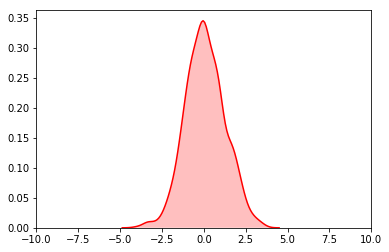

39
   ___________________________________________
alpha(a_00_l_im)
0.0658845528074531
1.4970583503058337


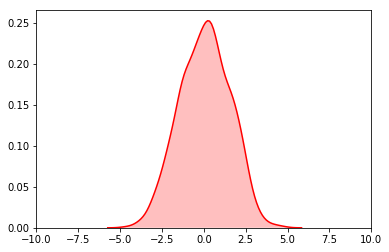

42
   ___________________________________________
alpha(a_00_r_re)
0.15169594916868231
1.2542096318982683


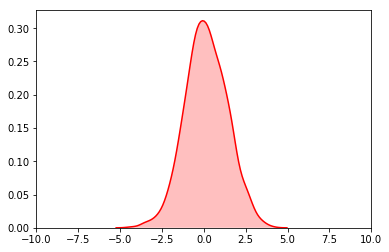

45
   ___________________________________________
alpha(a_00_r_im)
0.006858778780765767
1.2419968640774768


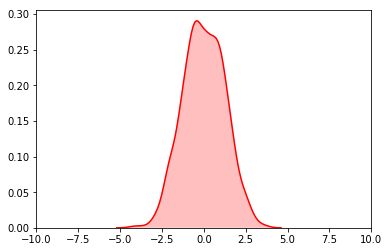

IndexError: list index out of range

In [12]:
#pulls ? 

data1 = pd.read_csv("/home/pierre-edouard/Desktop/ICL/Git_LHCb/Minuit/Test_stats/data_new.csv")
data1 = data1.values
N=1000
coefs1 , errs1 = get_arrays(data1 , N)

LaTex=LaTex_labels(amplitude_latex_names)
Title=Standard_labels(amplitude_names)



print()
for J in range(len(coefs)):
    if fix_array[J]==0:
        print(J)
        A1=coefs1[:,J]
        #print(A)
        fig , ax =plt.subplots()
        ave_val1=np.mean(A1)
        width1=np.std(A1-ave_val1)
        err1=errs1[:,J]
        
        #print(A-ave_val)

        print('   ___________________________________________')
        print(Title[J])

        #print(width)
        true_val=Coef0[J]
        clean_idx=[]
        for a in range(len(A1)):

            if abs(A1[a]) > width/1 :
                #print(a)
                #print(Coef0[J] , A[a])
                clean_idx.append(a)


        #n , bins , _ =plt.hist(A  , bins = 80 , normed= True)
    
        ax=sns.kdeplot((A1-true_val)/err1 , shade=True , color='red')
        #ax=sns.distplot(A1 , hist=True)
        #print(n)
        ymin, ymax = ax.get_ylim()
        print(np.mean((A1-true_val)/err1))
        print(np.std((A1-true_val)/err1))
        #print(coefs[:,j])

        plt.xlim((-10 , +10))
        #plt.xlim((ave_val1-4*width1 , ave_val1+4*width1))
        
        #xmin= meanLiam[0] - 10*np.sqrt(2400)*errsLiam[0] 
        #xmax= meanLiam[0] + 10*np.sqrt(2400)*errsLiam[0] 
        xmin , xmax = ax.get_xlim()
        X=np.linspace(xmin , xmax)
        
        plt.show()
        #plt.plot(X , max(n)*gaussian( X , meanLiam[j] , np.sqrt(1000)*errsLiam[j]) , '-')
'''
        Xmin , Xmax = ave_val-width ,  ave_val+width/np.sqrt(1000)
        ax.axvspan(Xmin, Xmax, alpha=0.1, color='red' , label= r'$\pm \sigma$')
        ax.legend()
        
'''

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 999.]),
 array([-3.92582568e+07, -3.53315847e+07, -3.14049127e+07, -2.74782407e+07,
        -2.35515687e+07, -1.96248967e+07, -1.56982247e+07, -1.17715527e+07,
        -7.84488065e+06, -3.91820864e+06,  8.46337536e+03]),
 <a list of 10 Patch objects>)

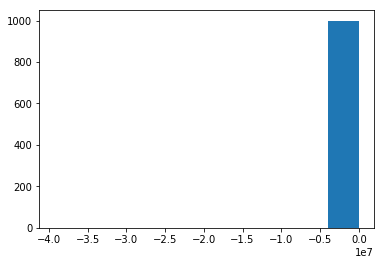